<a href="https://colab.research.google.com/github/dswendersonmelo/Data_Science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **INTRODUÇÃO**

As fraudes envolvendo cartões de crédito são um dos principais problemas enfrentados por bancos e instituições financeiras. Além, é claro, de ser um dos "pesadelos" do varejo hoje em dia. 

E há muitas causas para ocorrerem, desde pequenos descuidos por parte do consumidores com seus dados pessoais à falhas na segurança dos sistemas financeiros. Com consequências para todos os envolvidos, por exemplo, para os varejistas, além das perdas financeiras, as fraudes afetam a reputação do negócio.

Ademais, é aí que entra as análises de fraudes em cartões de crédito como ação preventiva contra as perdas. Esses processos consideram muitos critérios para identificar se os pagamentos são fraudulentos ou não e de modo geral são divididos em dois tipos de análises: automáticas ou manuais. 

Sendo que, o investimento em inteligência artificial para essas análises e detecções umas das áreas promissoras em Ciência de Dados e Machine Learning, pois a cada dia tem-se um volume maior de dados para "alimentar os modelos". E um algoritmo que tenha uma pequena melhora em relação a outros representa uma economia de milhões.

Portanto, esse projeto irá abordar esse problema comparando dois modelos de Machine Learning, isto é, o modelo de regressão logística binária(que vai ser chamada a partir daqui de apenas de regressão logística) e o de árvore de decisão. Com uma análise de qual dos dois obteve uma maior capacidade preditiva na detecção de fraudes.

# **PARTE 1 - ANÁLISE DO CONJUNTO DE DADOS**

## **FONTE E DISPOSIÇÃO DOS DADOS**

O conjunto de dados utilizado nesse projeto está disponível no [*kaggle*](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download) mas para que não ocorra a quebra dos códigos abaixo, o arquivo csv estará alocado no [github](https://github.com/dswendersonmelo/Data_Science/blob/Arquivos/creditcard.zip).

Esse dataset contém transações de cartões de titulares europeus que ocorreram durante dois dias em setembro de 2013. É formado apenas por váriaveis numéricas, que segundo o *kaggle*, passaram por uma transformação PCA(*Principal Component Analysis*), que de modo geral é um método de redução de dimensionalidade dos dados conservado o maior número possível de informações, somente as variáveis `Amount` e `Time` não passaram por tal transformação.
Isso ocorreu principalmente por questões de confidencialidade dos usuários.

Os componentes obtidos com PCA estão denotados como `V1`, `V2`, ...`V28`. A variável `Class` assume valor **1** em caso de fraude e **0** caso contrário.
`Time` representa os segundos decorridos a partir da primeira transação e `Amount` o valor da transação.

Abaixo estão os pacotes que serão usados no projeto

In [ ]:
# Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

% matplotlib inline

In [ ]:
# Importar o conjunto de dados para um dataframe

df = pd.read_csv('https://github.com/dswendersonmelo/Data_Science/raw/Arquivos/creditcard.zip')

In [ ]:
# Vê as 5 primeiras linhas

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Perceba que, como foi dito, há somente variáveis numéricas que num olhar não nos permite inferir conclusões, porém para os modelos de regressão logística e árvore de decisão que serão usados é ideal. Cabe também observar que os valores nas colunas `Time` e `Amount` estão em outra ordem de grandeza sendo necessário padronizar-los para uso nos modelos.


In [ ]:
# Dimensõs e estado do dataframe

tam = df.shape
q_class = df.Class.value_counts()
print('Há {} linhas e {} colunas.'.format(tam[0], tam[1]))
print('Há {} valores ausentes.'.format(df.isnull().sum().sum()))
print('Tem-se {} fraudes'.format(q_class[1]))

Há 284807 linhas e 31 colunas.
Há 0 valores ausentes.
Tem-se 492 fraudes


Veja que esse dataset não demanda de uma etapa de limpeza por não apresentar valores ausentes. Mas, por outro lado, dentre as 284.807 transações realizadas apenas 492 foram identificadas como fraudes o que nos dá um conjunto de dados extremamente desbalanceado que pode acarretar em uma baixa perfomace para a classe 1 ou até mesmo *overfitting*.

Veja abaixo o gráfico demonstrando visualmente a discrepância entre as classes 0 e 1. Bem como a matriz de correlação entre as variáveis nesse conjunto de dados original.

As fraudes representam 0.1727% do nosso conjunto de dados



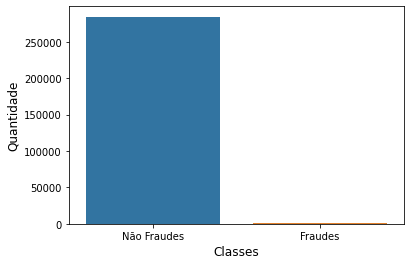

In [ ]:
# Vê o balanceamento das classes

ban = df.Class.value_counts(normalize = True) * 100
print('As fraudes representam {:.4}% do nosso conjunto de dados\n'.format(ban[1]))
sns.countplot(x = df.Class)
plt.ylabel('Quantidade', size = 12)
plt.xlabel('Classes', size = 12)
plt.xticks([0,1], ['Não Fraudes', 'Fraudes'], size = 10)
plt.show()

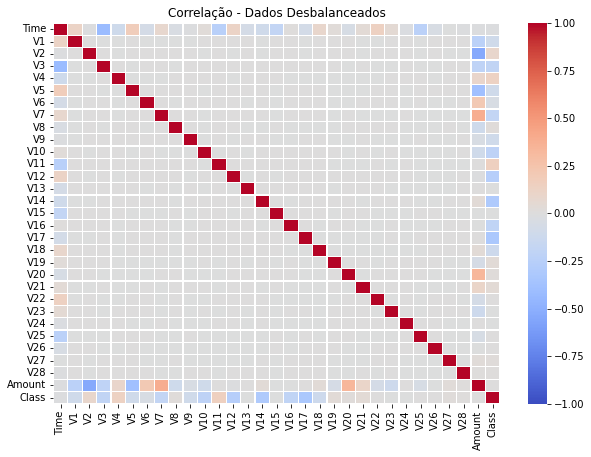

In [ ]:
# Matriz de Correlação com os Dados das Classes desbalanceados

corr = df.corr()
fig, ax = plt.subplots(figsize = (10, 7))
plt.title('Correlação - Dados Desbalanceados')
sns.heatmap(corr, cmap = 'coolwarm' , vmin = -1, vmax =1 , linewidths=0.2, ax = ax)
plt.show()

# **PARTE 2 - PREPARANDO OS DADOS**

Nesta parte do projeto, para que os dados possam alimentar os modelos que serão feitas as comparações, o dataset passará pelas seguintes etapas:

1. **Padronização** - onde as *features* `Time` e `Amount` que estão em outra ordem de grandeza serão padronizadas conforme o restante das *features* do dataset, pois considera-se, devido terem passado pelo processo de PCA, já estarem padronizadas.
2. **Dividir em conjuntos de treino e teste** - optou-se pela seguinte divisão: 85% do dados para treino e 15% para testes.
3. **Balancear as classes no dados de treino** - com a utilização da técnica de *undersampling* para evitar a baixa perfomace na classe 1 ou *overfitting* e assim generalizar melhor para a classe minoritária que é a representativa das fraudes.

In [ ]:
# Padronizar os dados - Colunas Time e Amount

df_std = df.copy()
df_std['Time'] = StandardScaler().fit_transform(df_std['Time'].values.reshape(-1, 1))
df_std['Amount'] = StandardScaler().fit_transform(df_std['Amount'].values.reshape(-1, 1))

In [ ]:
# Separar os dados em feature matrix e target vector

x = df_std.drop('Class', axis = 1)
y = df_std.Class

In [ ]:
# Dividir os Dados em Treino e Teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify = y, shuffle = True)

Perceba que foi usado o parâmetro `stratify = y` para que cada amostra pudesse manter a mesma proporção das classes e assim se comporte de maneira mais semelhante ao conjunto de dados original.

In [ ]:
# Balancear os Dados de treino com Undersampling

x_train_us, y_train_us = RandomUnderSampler().fit_resample(x_train, y_train)

Abaixo está o gráfico após o balanceamento das classes, veja como a quantidade de fraudes e não-fraudes estão equilibradas, podendo alimentar os modelos.

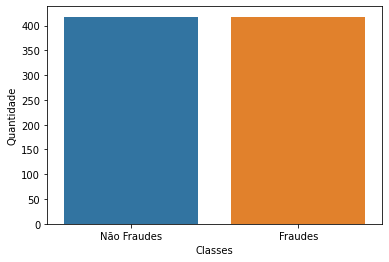

In [ ]:
# Vê o balanceamento das Classes

sns.countplot(x = y_train_us)
plt.ylabel('Quantidade')
plt.xlabel('Classes')
plt.xticks([0,1], ['Não Fraudes', 'Fraudes'])
plt.show()

E  note a diferença entre a próxima matriz de correlação com a que está acima, agora tem-se a possibilidade de obter muito mais informações depois do balanceamento.

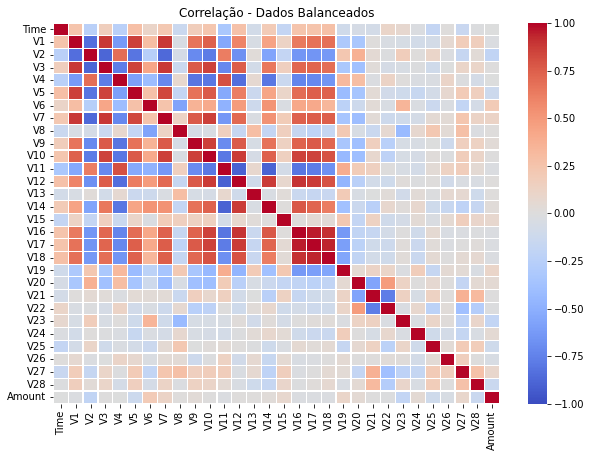

In [ ]:
# Matriz de correlação com os dados das Classes balanceados

corr = x_train_us.corr()
fig, ax = plt.subplots(figsize = (10, 7))
plt.title('Correlação - Dados Balanceados')
sns.heatmap(corr, cmap = 'coolwarm' , vmin = -1, vmax =1 , linewidths=0.2, ax = ax)
plt.show()

# **PARTE 3 - MODELOS DE MACHINE LEARNING**

Nesta parte serão realizados o treinamento seguido do teste de cada um dos modelos de Machine Learning.

## **REGRESSÃO LOGÍSTICA**

Antes de iniciar o treinamento deste modelo, é preciso fazer notar dois pontos:

*   É necessário para uma boa perfomace da regressão logística um grande conjunto de dados para o treinamento, porém como foi visto um pouco antes, os dados de treino são reduzidos devido ao balanceamento.
*   Também deve haver nenhuma ou pouca multicolinearidade entre as *features*, no entando, veja que na última matriz de correlação ocorre exatamente o contrário.

Ciente dessas observações, é muito provável que este modelo tenha seus resultados afetados. Porém, **exatamente neste projeto**, não será abordado o tratamento necessário para que ocorra uma boa perfomace da regressão logística, pois optou-se usar o mesmo conjunto de dados para ambos os modelos a fim de realizar uma **comparação básica** entre os resultados. Certo de que em um ambiente profissional não se deve proceder desta maneira.

Com isso dito, abaixo estão os passos do treinamento e teste.



In [ ]:
# Instanciar o modelo

model_rlog = LogisticRegression()

In [ ]:
# Treinar o Modelo de Regressão Logistica

model_rlog.fit(x_train_us, y_train_us)

LogisticRegression()

In [ ]:
# Fazer as previsões em cima dos novos dados

y_pred_val = model_rlog.predict(x_test)

In [ ]:
# Vê o relatório de classificação

print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     42648
           1       0.04      0.92      0.08        74

    accuracy                           0.97     42722
   macro avg       0.52      0.94      0.53     42722
weighted avg       1.00      0.97      0.98     42722



Neste tipo de problema, com os dados desbalanceados, a acurácia não é uma métrica adequada para avaliar este classificador. Mas perceba que o modelo obteve um *recall* de 0.92, o que é bom, pois indica a relação entre as previsões positivas realizadas corretamente(True Positive - TP) e todas as previsões que realmente são positivas(1).

Na matriz da confusão abaixo, o número de verdadeiros positvos(TP) é 68 enquanto o de falsos positivos(False Positive - FP) é 1.481. Em um problema como esse é muito melhor que se tenha um maior número de falsos positivos, isto é, o sistema entende como fraude mas não o é, do que um verdadeiro negativo(é fraude mais o sistema classifica como não-fraude).

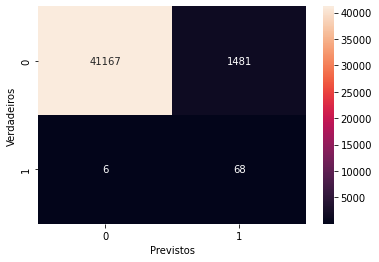

In [ ]:
# Matriz da Confusão

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_val), ax = ax, annot = True, fmt = '.5g')
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos')
plt.show()

## **ÁRVORE DE DECISÃO**

Abaixo estão os passos para o treinamento e teste da árvore de decisão

In [ ]:
# Instanciar o modelo de árvore de decisão

model_dtree = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

Aqui foi instanciado o modelo a partir do pacote importado passando alguns hyperparâmetros: `criterion = 'entropy'` para um melhor ganho de informação e `max_depth = 3` que é a profundidade recomendada pelo *Scikit-Learn* para evitar o *overfitting*.

In [ ]:
# Treinar o modelo com os dados balanceados

model_dtree.fit(x_train_us, y_train_us)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Fazer as previsões em cima dos dados de testes

y_pred_dtree = model_dtree.predict(x_test)

In [ ]:
# Vê o relatório de classificação

print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     42648
           1       0.02      0.89      0.05        74

    accuracy                           0.94     42722
   macro avg       0.51      0.92      0.51     42722
weighted avg       1.00      0.94      0.97     42722



Como dito antes, a acurácia não é uma boa métrica neste caso. No entanto, observe a recall de 0.89 que o modelo obteve.

E veja na matriz de confusão que a árvore obteve resultados um pouco inferiores aos da regressão logistica.

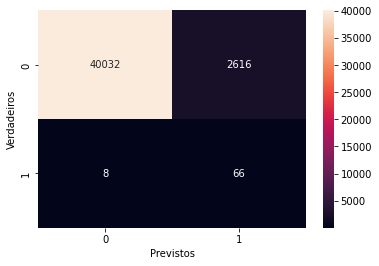

In [ ]:
# Matrix da Confusão

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), ax = ax, annot = True, fmt = '.5g')
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos')
plt.show()

# **CONCLUSÃO**

Esse problema de fraudes em cartões de crédito certamente estão longe de acabar, sendo necessário investimentos constantes em novas tecnologias e conhecimentos para prevenir essas situações criminosas.

Os modelos treinados e testados neste projeto são apenas alguns dos vários existentes e que são muito mais complexos na implementação, com a obtenção de ótimos resultados. 

E para finalizar, tendo em mente as ressalvas ditas, o modelo de regressão logística teve um melhor **resultado marginal** comparado com a árvore de decisão, só que este último obteve uma maior quantidade de falsos positivos e isso também pode ser bom na prevenção, mas tudo vai depende de como a instituição financeira irá querer abordar o problema visto que é uma situação incomoda para o cliente ter o cartão bloqueado quando não o era pra ser.

Obrigado pela leitura!
